In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [21]:
data = pd.read_csv('Datasets/TSLA.csv')

In [22]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-19,245.000000,247.139999,236.976669,245.529999,245.529999,80890200
1,2022-07-20,246.783340,250.663330,243.483337,247.500000,247.500000,88864200
2,2022-07-21,255.106674,273.266663,254.866669,271.706665,271.706665,142032300
3,2022-07-22,276.220001,280.786682,270.713318,272.243347,272.243347,103472700
4,2022-07-25,272.216675,274.146667,267.399994,268.433319,268.433319,64073400


In [23]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [25]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,213.341614,218.046614,208.378730,213.346746,213.346746,1.239752e+08
std,53.526656,54.128762,52.966210,53.521440,53.521440,4.925804e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.902500,182.459999,172.507496,178.762501,178.762501,8.494012e+07
50%,198.919998,203.474998,193.599998,197.684998,197.684998,1.197496e+08
75%,262.077499,271.491661,258.307503,264.769989,264.769989,1.589152e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


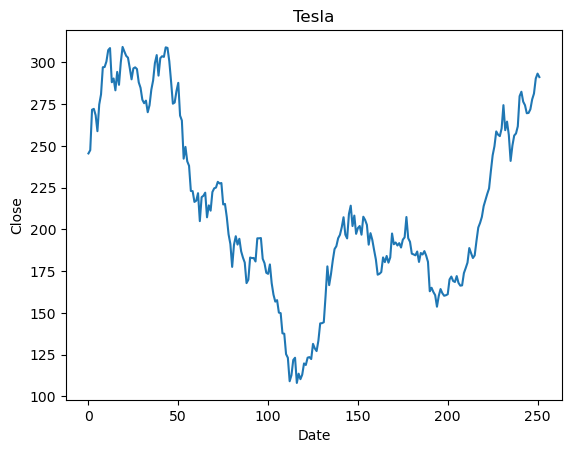

In [26]:
close = data['Close']
ax = close.plot(title = 'Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [27]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [32]:
data = data[['Date', 'Close']]

In [33]:
data

,Date,Close
0,2022-07-19,245.529999
1,2022-07-20,247.500000
2,2022-07-21,271.706665
3,2022-07-22,272.243347
4,2022-07-25,268.433319
...,...,...
247,2023-07-13,277.899994
248,2023-07-14,281.380005
249,2023-07-17,290.380005
250,2023-07-18,293.339996


In [34]:
data = data.rename(columns = {'Date' : 'ds', 'Close' : 'y'})

In [2]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

In [ ]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")